# Analysis

## Three Observations:
    *There is a clear correlation between temperature and latitude. Given that the analysis was done in December, the cities with northern latitudes have colder temperatures, whereas cities with southern latitudes have higher temperature. 
    *No correlation was found between humidity and latitude
    *No correlation was found between cloudiness and latitude
    

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import pytemperature
import itertools

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "..Resources/cities.csv"

# Range of latitudes and longitudes. Create three buckets of latitudes to ensure samples 
# are representative of the entire world

lat_ranges = [(-90,-30),(-30,30),(30,90)]
lng_range = (-180, 180)

In [9]:
# List for holding lat_lngs and cities
lats = []
lngs = []

cities = []

# Create a set of random lat and lng combinations
for lat_range in lat_ranges:
    lats = []
    lngs = []
    lat_range_count=len(cities)
    lats_rnd = np.random.uniform(low=lat_range[0], high=lat_range[1], size=600)
    lngs_rnd= np.random.uniform(low=-180.000, high=180.000, size=600)
    
    lats.append(lats_rnd)
    lngs.append(lngs_rnd)
    lat_lngs=zip(lats[0], lngs[0])
    
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
        if city not in cities:
            cities.append(city)
   
   
    lat_range_count=len(cities)-lat_range_count
    
    
    print(f"Total cities in latitude range {lat_range}: {lat_range_count}")

print(f"Total cities: {len(cities)}")

Total cities in latitude range (-90, -30): 86
Total cities in latitude range (-30, 30): 319
Total cities in latitude range (30, 90): 283
Total cities: 688


In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [11]:
weather_info=[]

for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        name = weather_json['name']
        cloudiness = weather_json['clouds']['all']
        country = weather_json['sys']['country']
        date = weather_json['dt']
        humidity = weather_json['main']['humidity']
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']
        max_temp = weather_json['main']['temp_max']
        wind_speed = weather_json['wind']['speed']
        print(f"Processing | {weather_json['name']}")
    
        weather_info.append({"City": name,
                             "Cloudiness": cloudiness,
                             "Country": country,
                             "Date": date,
                             "Humidity": humidity,
                             "Lat": lat,
                             "Lng": lng,
                             "Max Temp": max_temp,
                             "Wind Speed": wind_speed})
    
    except KeyError:
        print("City not found. Skipping...")

Processing | Te Anau
Processing | Busselton
Processing | Port Alfred
Processing | Bluff
Processing | New Norfolk
Processing | Ushuaia
Processing | Kruisfontein
City not found. Skipping...
Processing | Hobart
Processing | Hermanus
Processing | Mataura
Processing | Mar del Plata
Processing | Rikitea
Processing | Punta Arenas
Processing | Ulladulla
Processing | Cape Town
Processing | Waipawa
Processing | Saint-Philippe
City not found. Skipping...
Processing | Castro
Processing | Avarua
Processing | Bredasdorp
Processing | Mahebourg
Processing | Margate
City not found. Skipping...
Processing | Vaini
Processing | Lebu
Processing | Albany
Processing | Jamestown
Processing | Westport
Processing | Bambous Virieux
Processing | Port Elizabeth
Processing | Wyndham
Processing | Cidreira
Processing | Luderitz
Processing | Melo
Processing | Christchurch
Processing | Saldanha
Processing | Calbuco
Processing | Methven
Processing | Necochea
Processing | Arraial do Cabo
Processing | East London
Processi

Processing | Puerto Leguizamo
Processing | Rey Bouba
Processing | Ampanihy
Processing | Arrecife
Processing | Kedougou
Processing | Matadi
Processing | Barcelos
Processing | Half Moon Bay
Processing | Gorontalo
Processing | Mahasamund
Processing | Guadalupe
Processing | Nouadhibou
Processing | Laem Sing
Processing | Puerto Baquerizo Moreno
Processing | Mogadishu
Processing | Jijiga
Processing | Djibo
City not found. Skipping...
Processing | Aquiraz
Processing | Ouallam
Processing | Kuliyapitiya
Processing | Lavumisa
Processing | Meulaboh
Processing | Sassandra
Processing | Paredon
Processing | Kahului
Processing | Bilma
Processing | Sao Luis
Processing | Tshane
Processing | Ingham
Processing | Garoowe
Processing | Maragogi
Processing | Sao Filipe
Processing | Lethem
Processing | Navrongo
Processing | Padang
Processing | Savelugu
Processing | Pyapon
Processing | Kununurra
Processing | Nalut
Processing | Chibombo
Processing | Mahajanga
Processing | Daniel Flores
City not found. Skipping.

In [12]:
weather_data=pd.DataFrame(weather_info)

In [13]:
#Convert temperature from Kelvin to F

weather_data['Max Temp']=weather_data['Max Temp'].apply(lambda x: pytemperature.k2f(x))

In [14]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Te Anau,88,NZ,1581631659,85,-45.42,167.72,48.47,1.38
1,Busselton,14,AU,1581631659,54,-33.65,115.33,67.98,5.76
2,Port Alfred,34,ZA,1581631659,97,-33.59,26.89,67.98,1.79
3,Bluff,95,NZ,1581631660,72,-46.60,168.33,54.98,2.24
4,New Norfolk,75,AU,1581631660,82,-42.78,147.06,64.97,3.10


In [15]:
#Etracting fields to be plotted from dataframe 

lats = weather_data["Lat"]
max_temps = weather_data["Max Temp"]
humidity = weather_data["Humidity"]
cloudiness = weather_data["Cloudiness"]
wind_speed = weather_data["Wind Speed"]

In [16]:
#Export to csv
weather_data.to_csv(output_data_file, index_label="City_ID")

In [17]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
City          630 non-null object
Cloudiness    630 non-null int64
Country       630 non-null object
Date          630 non-null int64
Humidity      630 non-null int64
Lat           630 non-null float64
Lng           630 non-null float64
Max Temp      630 non-null float64
Wind Speed    630 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 44.4+ KB


In [18]:
#Latitude vs. Temperature Plot

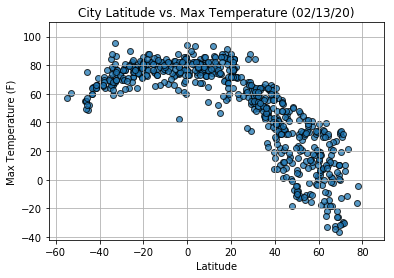

In [23]:
plt.scatter(lats, max_temps, marker='o', edgecolor='black', alpha=0.75)
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim((weather_data['Lat'].min()*1.15), (weather_data['Lat'].max()*1.15))
plt.ylim((weather_data['Max Temp'].min()*1.15), (weather_data['Max Temp'].max()*1.15))
plt.grid(True)

plt.savefig("../assets/Fig1.png")

plt.show()

In [91]:
#Latitude vs. Humidity Plot

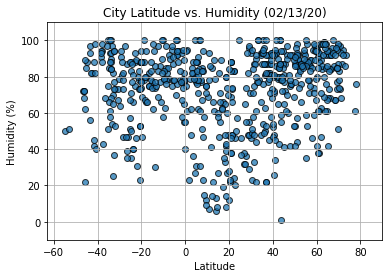

In [22]:
plt.scatter(lats, humidity, marker='o', edgecolors='black', alpha=0.75)
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim((weather_data['Lat'].min()*1.15), (weather_data['Lat'].max()*1.15))
plt.ylim(-10, 110)

plt.grid(True)

plt.savefig("../assets/Fig2.png")

plt.show()

In [103]:
#Latitude vs. Cloudiness Plot

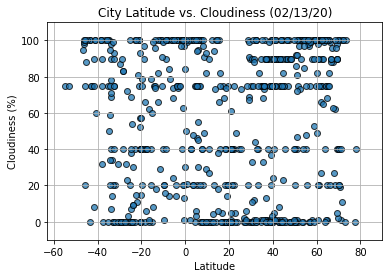

In [25]:
plt.scatter(lats, cloudiness, marker='o', edgecolors='black', alpha=0.75)
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim((weather_data['Lat'].min()*1.15), (weather_data['Lat'].max()*1.15))
plt.ylim(-10, 110)

plt.grid(True)

plt.savefig("../assets/Fig3.png")

plt.show()

In [22]:
#Latitude vs. Windspeed

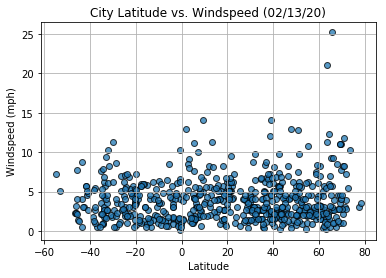

In [26]:
plt.scatter(lats, wind_speed, marker='o', edgecolors='black', alpha=0.75)
plt.title("City Latitude vs. Windspeed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")

plt.grid(True)

plt.savefig("../assets/Fig4.png")

plt.show()


In [28]:
#remove non relevent columns from dataframe to display on website
df = weather_data[['City','Country','Lat','Lng','Max Temp','Cloudiness', 'Humidity','Wind Speed']]
df.head()

,City,Country,Lat,Lng,Max Temp,Cloudiness,Humidity,Wind Speed
0,Te Anau,NZ,-45.42,167.72,48.47,88,85,1.38
1,Busselton,AU,-33.65,115.33,67.98,14,54,5.76
2,Port Alfred,ZA,-33.59,26.89,67.98,34,97,1.79
3,Bluff,NZ,-46.60,168.33,54.98,95,72,2.24
4,New Norfolk,AU,-42.78,147.06,64.97,75,82,3.10


In [29]:
df.to_csv(output_data_file, index_label='City_ID')

In [32]:
html=df.to_html()

text_file = open("data_output.html", "w")
text_file.write(html)
text_file.close()